In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data,train_label),(test_data,test_label)=fashion_mnist.load_data()

In [4]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
train_data[0],train_label[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [6]:
import matplotlib.pyplot as plt

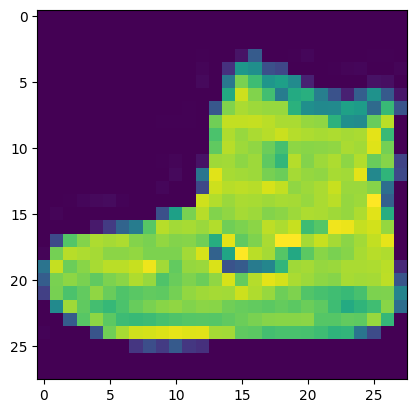

In [7]:
plt.imshow(train_data[0])

In [8]:
print(train_label[0])

9


In [9]:
# As labels are in numbers so we will convert them first in human readable form
class_names=['T-shirt/Top','Trouser','Pull over','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle-boots']

In [10]:
class_names[train_label[0]]

'Ankle-boots'

Text(0.5, 1.0, 'T-shirt/Top')

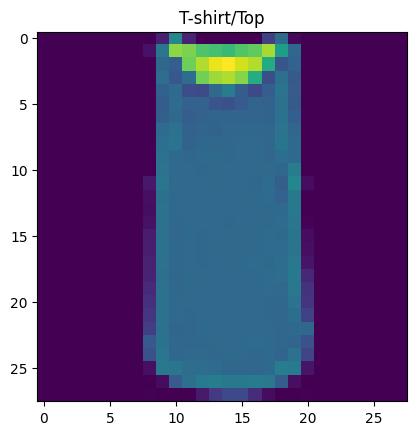

In [11]:
# Plotting now an example with its understandable label
plt.imshow(train_data[2])
plt.title(class_names[train_label[2]])

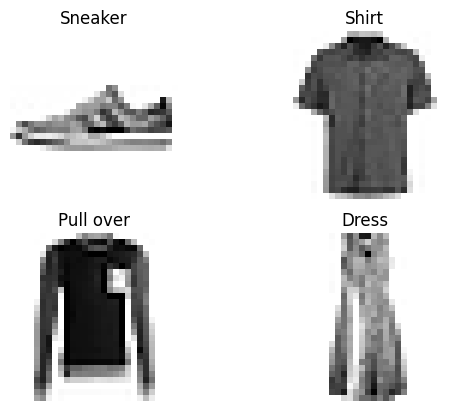

In [12]:
# Creating a random function that displays images randomly
import random

for i in range(4):
    plt.subplot(2,2,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_label[rand_index]])
    plt.axis('off')

**Make A Multiclass classification model now**
> Points to remember :
* final activation as softmax
* No of units of final layer should be equal to number of classes
> Things to focus on when facing shape error:
* you can add a Flatterned layers
* check loss function sparse for numeric labels and categorical for one hot encoded ones
* check input and output shapes


In [29]:
# set seed
tf.random.set_seed(42)

# Model Creation
multi_classification_model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
multi_classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                                   metrics=['accuracy'])

In [30]:
non_norm_history=multi_classification_model.fit(train_data,train_label,epochs=10,validation_data=(test_data,test_label))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1001 - loss: 2.3784 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0997 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0996 - loss: 2.3147 - val_accuracy: 0.1000 - val_loss: 2.3104
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0996 - loss: 2.3147 - 

**Lets now train on One hot encoded labels**

In [31]:
test_label[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [32]:
test_label_oh_encoded=tf.one_hot(test_label,depth=10)
train_label_oh_encoded=tf.one_hot(train_label,depth=10)

In [35]:
test_label_oh_encoded[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)>

In [39]:
# Model for working with one hot encoded labels
tf.random.set_seed(42)
multi_oh_class_model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
multi_oh_class_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Categotical for one hot labels
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)
non_norm_history_oh=multi_oh_class_model.fit(train_data,train_label_oh_encoded,epochs=10,validation_data=(test_data,test_label_oh_encoded))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0986 - loss: 2.3113 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0974 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0973 - loss: 2.3028 - 